Python OpenCV2 by Vitthal 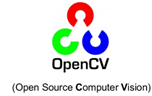

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Adding two images by performing bitwise operation

In [6]:
img = cv2.imread("candies.png")
logo = cv2.imread("pylogo.png")
rows,cols,channels = logo.shape # Get exact rows and cols in logo image
roi = img[0:rows,0:cols] # Using rows and cols, define the ROI(region of interest) in main image

img2Gray = cv2.cvtColor(logo,cv2.COLOR_BGR2GRAY)
retVal,mask = cv2.threshold(img2Gray,220,255,cv2.THRESH_BINARY_INV) # _INV is required to make 0 to 1 and 1 to 0
                                                                    #so that in whhite area exact logo will fit in
mask_inv = cv2.bitwise_not(mask)
img_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
img_fg = cv2.bitwise_and(logo,logo,mask=mask)

dst = cv2.add(img_bg,img_fg)
img[0:rows,0:cols] = dst

cv2.imshow("gray",img2Gray)
cv2.imshow("mask",mask)
cv2.imshow("res",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(363, 573, 3)

### 2. Template_Matching_objectDetection

In [9]:
pcb = cv2.imread("pcb_layout.png")
pcb_gray = cv2.cvtColor(pcb,cv2.COLOR_BGR2GRAY)
pcb_temp = cv2.imread("pcb_template.png",0)
w,h = pcb_temp.shape[::-1] # Reversing to get the width (columns) first and height (height)

res = cv2.matchTemplate(pcb_gray,pcb_temp,cv2.TM_CCOEFF_NORMED)
# print(res)
threshold = .58
loc = np.where(res>=threshold)
print(loc)
total = len(loc[0]) # get the count of total occurences
for pt in zip(*loc[::-1]): # Unzip co-ordinates and draw rectangles over found template
    print(pt)
    cv2.rectangle(pcb,pt,(pt[0]+w,pt[1]+h),(0,0,255),1)
    
cv2.putText(pcb,"Total::"+str(total),(10,20),cv2.FONT_HERSHEY_PLAIN,1,(0,0,255),1) # str casting is required for text`
cv2.imshow("pcb",pcb)

cv2.waitKey(0)
cv2.destroyAllWindows()

(array([  3,   3,   3,   3,   5,  14,  15,  21,  25,  27,  28,  33,  34,
        45,  46,  51,  52,  57,  58,  69,  70,  79,  81,  82,  82, 100,
       100, 118, 118, 122, 124, 124, 129, 130, 136, 136, 138, 148, 148,
       149, 149, 154, 155, 159, 162, 178, 179, 179, 191, 197, 197, 197,
       197, 197, 197, 197, 207, 220, 221, 223, 224, 237, 265, 265, 271,
       271, 274, 293, 293, 293, 294, 294, 294, 294, 294, 310, 318, 319,
       324, 324], dtype=int64), array([290, 291, 330, 331, 158, 198, 198, 328, 692,  64,  64, 373, 373,
        62, 563, 712, 712, 667, 667, 103, 103, 646, 718, 676, 718,  60,
        61, 666, 704, 151,  60,  61, 560, 412, 473, 474,  95, 709, 710,
       709, 710, 415, 415, 577, 554, 213, 213, 252, 478, 170, 171, 189,
       213, 252, 415, 416, 328, 477, 477, 486, 357, 581, 476, 477, 576,
       577, 503, 185, 272, 273, 185, 239, 240, 272, 273, 148, 266, 232,
       629, 630], dtype=int64))
(290, 3)
(291, 3)
(330, 3)
(331, 3)
(158, 5)
(198, 14)
(198, 15)
(328, 

### 3. Face_Eye_Detection over Human body

In [12]:
# https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

In [14]:
cap = cv2.VideoCapture(0)

while True:
    ret,img = cap.read()
    if ret == True:
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        print ('cannot read frame')
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0,),3)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0,),2)
    cv2.imshow("image",img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

### 4. Open video using webCam, record and save to file

In [15]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*"XVID")
out = cv2.VideoWriter("output.avi",fourcc,20.0,(640,480)) # 20.0 = fps
while True:
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    out.write(frame)
    cv2.imshow("fame",frame)
    cv2.imshow("fame_gray",gray)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
out.release()
cv2.destroyAllWindows()